<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [3]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  18.7M      0  0:00:01  0:00:01 --:--:-- 18.7M


In [4]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [5]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [6]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]
#print(vinosMX.head(3))

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

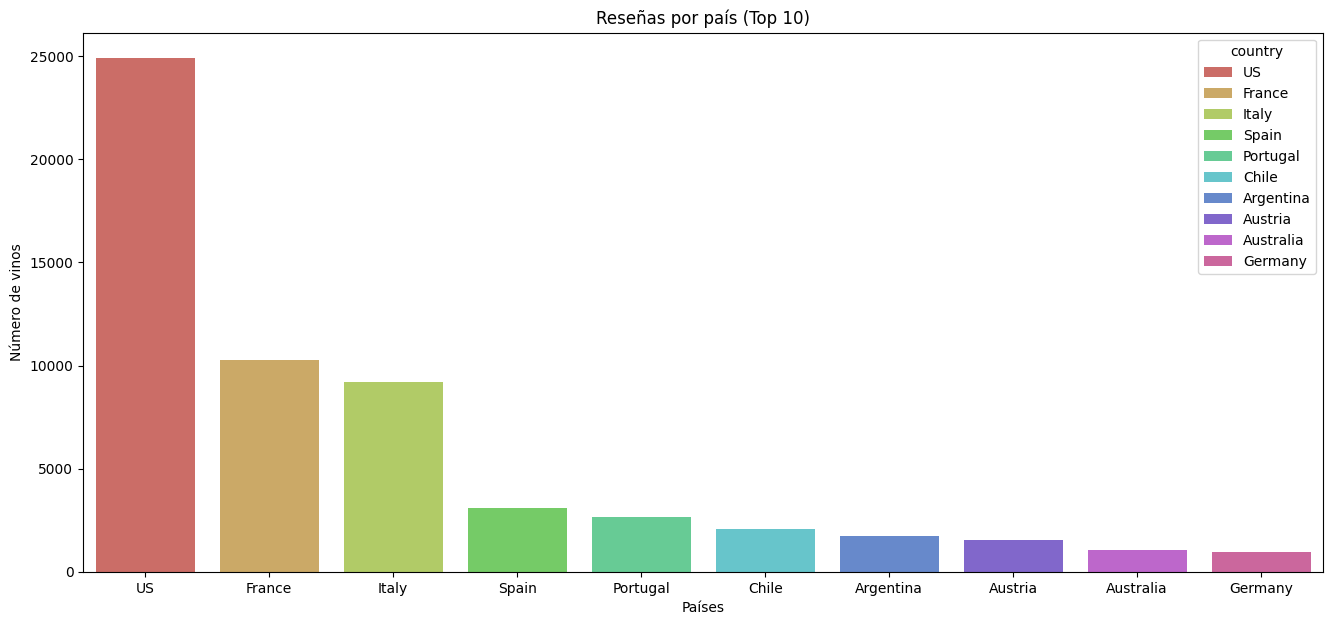

In [7]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
#sns.barplot(x=x[:10], y=y[:10], palette= "hls") # "viridis" gradiente verde-azul. Se debe asignar el slice "X[ :10]" al parametro "x", por ello x=x[..]

# En una sola línea:
# Se debe agregar HUE --> "hue=df.country.value_counts().index[:10] en nuevas versiones de seaborn, acompañado de "palette= "hls" y "legend=True o False"
sns.barplot(x=df.country.value_counts().index[:10], y=df.country.value_counts().values[:10], hue=df.country.value_counts().index[:10], palette= "hls", legend=True)

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [8]:
df.head(3) # Existen valores NaN en columna "Price"? Sí, en la primer fila, cuantos hay en total en esta columna?

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [9]:
df.isna().sum(axis=0).to_frame().T # Se cuentan los valores NaN que hay en toda la columna "Price" (4245) y saber que otrso NaN hay en otras columnas

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,31,0,17267,0,4245,31,9832,36927,12409,14614,0,0,0


In [10]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [11]:
# Para saber si hay valores NaN:  hay_nans = df["price"].isna().any()
# print(hay_nans) --> True:Si hay

num_nans = df["price"].isna().sum()
print(num_nans)

4245


In [12]:
limpiar_nans = df.dropna(subset=['price'])
limpiar_nans.isna().sum(axis=0).to_frame().T

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,27,0,16009,0,0,27,9008,32780,11559,13742,0,0,0


In [13]:
hay_nans2 = limpiar_nans["price"].isna().any()
print(hay_nans2)
limpiar_nans.head(3)

False


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


In [14]:
df = limpiar_nans

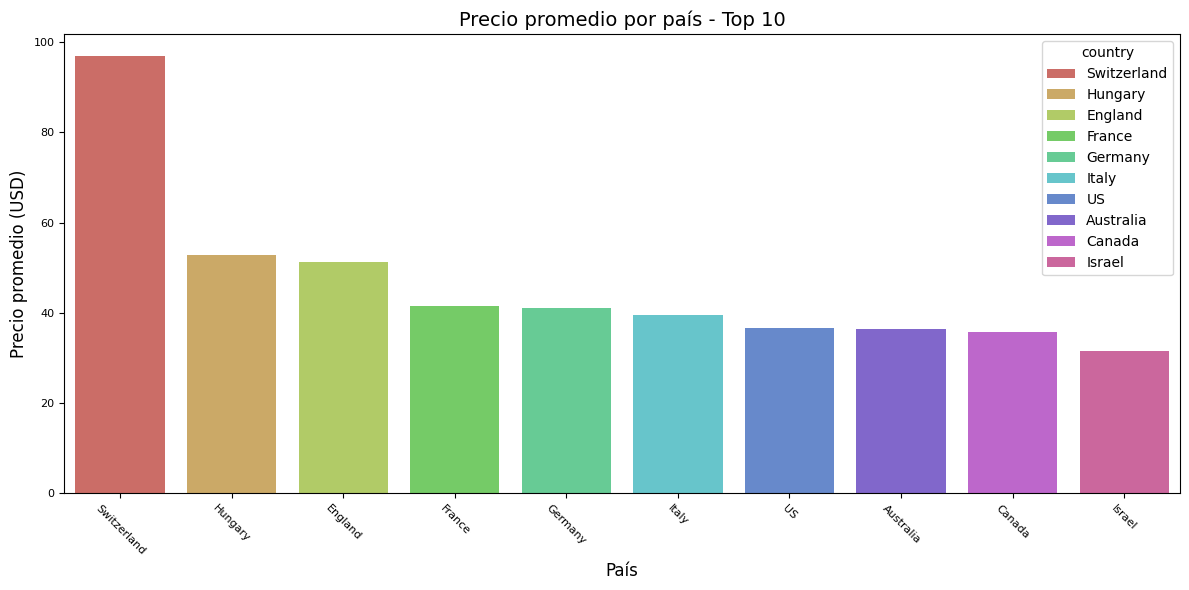

In [15]:
promedios = df.groupby('country')['price'].mean().sort_values(ascending=False)

# 2. Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    x=promedios.index[:10],  # Países en eje X
    y=promedios.values[:10], # Promedios en eje Y
    hue=promedios.index[:10], # Colores en Paises
    palette="hls",   # Paleta de colores
    legend=True
)

plt.title('Precio promedio por país - Top 10', fontsize=14)
plt.xlabel('País', fontsize=12) # Tamaño fuente en Etiqueta País
plt.ylabel('Precio promedio (USD)', fontsize=12) # Tamaño fuente en Etiqueta Promedio
plt.xticks(rotation=-45, fontsize=8)  # Rotar nombres de países para legibilidad y tamaño fuente en paises
plt.yticks(fontsize=8)  # Tamaño fuente en valores promedio
plt.tight_layout()       # Ajustar márgenes
plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

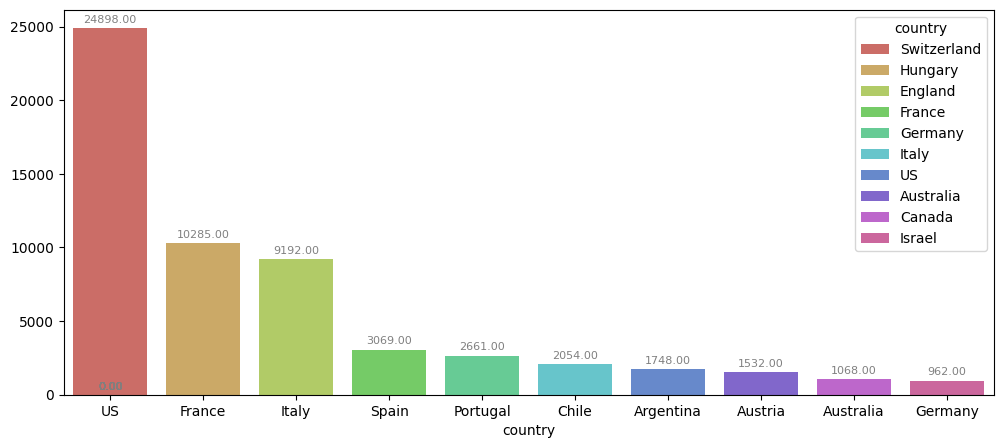

In [16]:
#Definimos el tamaño del canvas
plt.figure(figsize=(12,5))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10], hue=promedios.index[:10], palette="hls")


# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='gray',\
                xytext=(0, 6),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

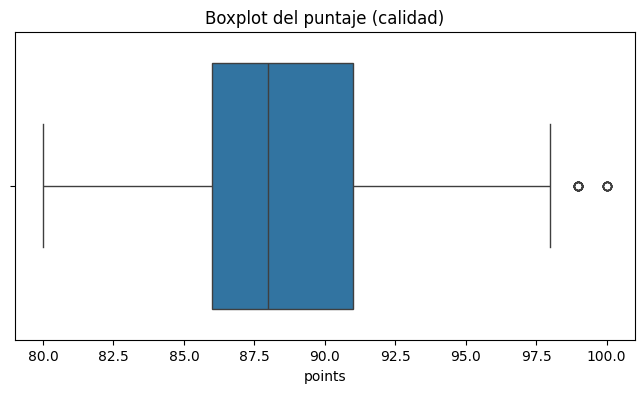

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

In [18]:
# Para saber si hay valores NaN:  hay_nans = df["price"].isna().any()
# print(hay_nans) --> True:Si hay

nan_pais = df["country"].isna().sum()
print(nan_pais)


27


In [19]:

cero_nan_country = df.dropna(subset=['country'])
cero_nan_country.isna().sum(axis=0).to_frame().T



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,0,16004,0,0,0,8981,32753,11559,13742,0,0,0


In [20]:
hay_aun_nan_country = cero_nan_country["price"].isna().any()
print(hay_aun_nan_country)
cero_nan_country.head(3)

False


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


In [21]:
df_2 = df[df['points'] <= float(97.5)]
df_2.points.value_counts().to_frame().T

points,87,88,90,86,91,89,85,92,84,93,94,83,82,95,81,96,80,97
count,7545,7085,6601,5171,5070,4869,4280,4269,2921,2779,1710,1228,841,568,285,236,147,87


In [22]:
df = df_2

<ipython-input-23-859cb5c44b73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["razon_puntos_por_precio"] = df["points"] / df["price"]


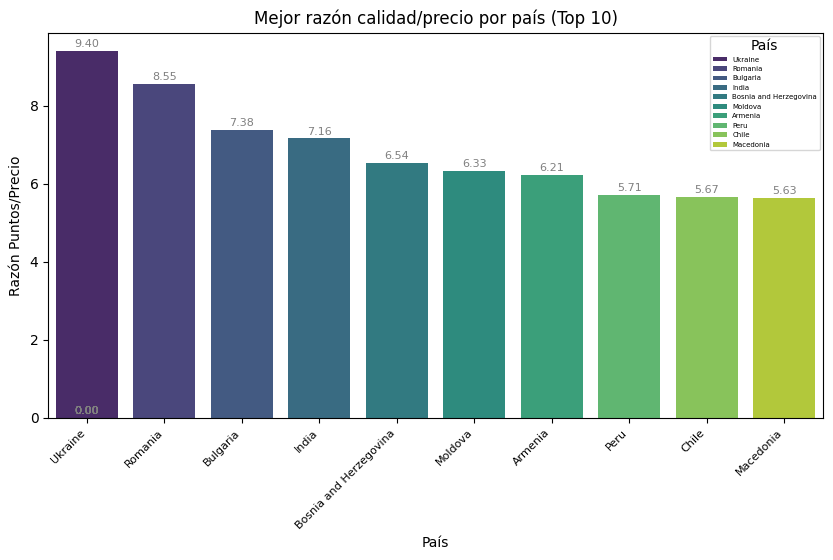

In [23]:
df["razon_puntos_por_precio"] = df["points"] / df["price"]
mejor_relacion_por_pais = df.groupby("country")["razon_puntos_por_precio"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))

x = mejor_relacion_por_pais.index
y = mejor_relacion_por_pais.values

ax = sns.barplot(x=x[:10], y=y[:10], hue=mejor_relacion_por_pais.index[:10], palette="viridis", legend=True)
plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right", fontsize = 8)
plt.ylabel("Razón Puntos/Precio")

plt.legend(
    title="País",  # Título opcional
    loc='upper right',  # Posición (ajústala según necesites)
    bbox_to_anchor=(1, 1.0), borderaxespad=0.5, fontsize=5 )  # Para ajustes finos (opcional)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                 textcoords='offset points')
plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

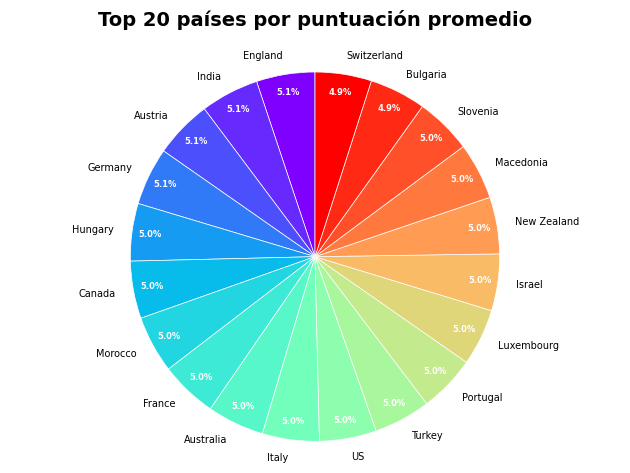

In [24]:
import matplotlib.pyplot as plt
import numpy as np

top_20_points = df.groupby('country')['points'].mean().sort_values(ascending=False).head(20)

# Datos
labels = top_20_points.index
sizes = top_20_points.values
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

# Crear gráfico con plt.pie() (devuelve wedges, texts, autotexts)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle= 90,
    pctdistance=0.9,
    textprops={'fontsize': 7},
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

# Personalizar autotexts (ahora la variable existe)
plt.setp(autotexts, size=6, weight='bold', color='white')

# Añadir título
plt.title('Top 20 países por puntuación promedio', fontsize=14, pad=20, weight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.axis('equal')
plt.show()


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [25]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,razon_puntos_por_precio
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,6.214286


In [26]:
#TU CODIGO
top_10_variedades = df['variety'].value_counts().head(10)
print(top_10_variedades / top_10_variedades.sum() * 100)  # Proporción porcentual


variety
Pinot Noir                  18.936963
Chardonnay                  16.318263
Cabernet Sauvignon          13.939394
Red Blend                   12.711068
Bordeaux-style Red Blend     8.021390
Riesling                     7.450980
Sauvignon Blanc              7.314860
Syrah                        6.067088
Rosé                         4.718846
Merlot                       4.521147
Name: count, dtype: float64


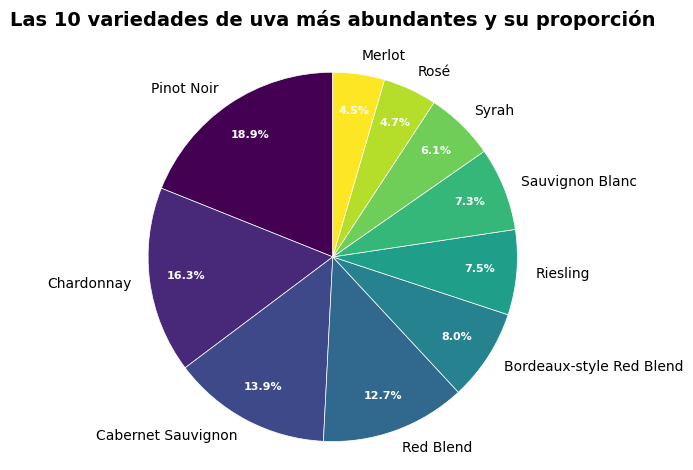

In [27]:
# Datos
labels = top_10_variedades.index
sizes = top_10_variedades.values
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Crear gráfico con plt.pie() (devuelve wedges, texts, autotexts)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle= 90,
    pctdistance=0.8,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

# Personalizar autotexts (ahora la variable existe)
plt.setp(autotexts, size=8, weight='bold', color='white')

# Añadir título
plt.title('Las 10 variedades de uva más abundantes y su proporción', fontsize=14, pad=20, weight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.axis('equal')
plt.show()

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [28]:
# La suma total de las mejores 20 bodegas es: 1375, la proporcion de cada bodega estara en funcion de esta suma.
top_20_bodegas_1 = df['winery'].value_counts().head(20)
print(top_20_bodegas_1.sum())

1375


In [29]:
#TU CODIGO
top_20_bodegas_1 = df['winery'].value_counts().head(20)
print(top_20_bodegas_1.to_frame().T) # Veces que se menciona cada bodega del top 20.
print(top_20_bodegas_1/ top_20_bodegas_1.sum() * 100)  # Proporción porcentual

winery  Wines & Winemakers  Testarossa  Chateau Ste. Michelle  DFJ Vinhos  \
count                  103          97                     86          83   

winery  Williams Selyem  Louis Latour  Concha y Toro  Gary Farrell  Lynmar  \
count                82            78             77            74      72   

winery  Kendall-Jackson  Robert Mondavi  Georges Duboeuf  Trapiche  \
count                68              65               61        57   

winery  Columbia Crest  Undurraga  Siduri  Rodney Strong  Foxen  \
count               56         55      55             53     52   

winery  Kirkland Signature  Dutton-Goldfield  
count                   51                50  
winery
Wines & Winemakers       7.490909
Testarossa               7.054545
Chateau Ste. Michelle    6.254545
DFJ Vinhos               6.036364
Williams Selyem          5.963636
Louis Latour             5.672727
Concha y Toro            5.600000
Gary Farrell             5.381818
Lynmar                   5.236364
Kenda

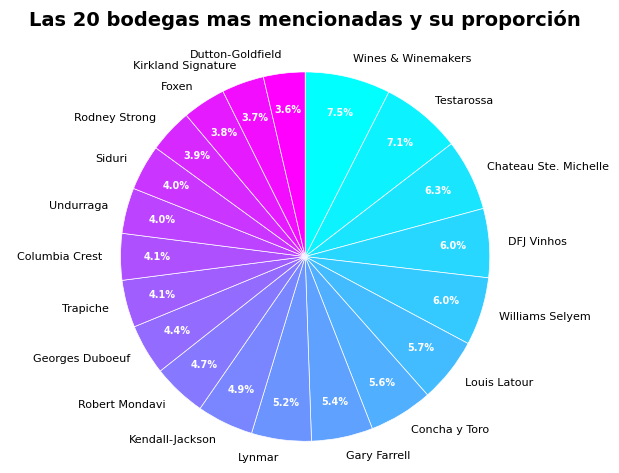

In [30]:
# Datos
labels = top_20_bodegas_1.index
sizes = top_20_bodegas_1.values
colors = plt.cm.cool(np.linspace(0, 1, len(labels)))

# Crear gráfico con plt.pie() (devuelve wedges, texts, autotexts)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle= 90,
    counterclock=False,
    pctdistance=0.8,
    textprops={'fontsize': 8},
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

# Personalizar autotexts
plt.setp(autotexts, size=7, weight='bold', color='white')

# Añadir título
plt.title('Las 20 bodegas mas mencionadas y su proporción', fontsize=14, pad=20, weight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.axis('equal')
plt.show()

In [31]:
# Considerando la suma total de conteo de todas las bodegas, la proporcion de las mejores 20 bodegas se reduce como sigue.
top_20_bodegas_2 = df['winery'].value_counts()
print(top_20_bodegas_2.sum())

55692


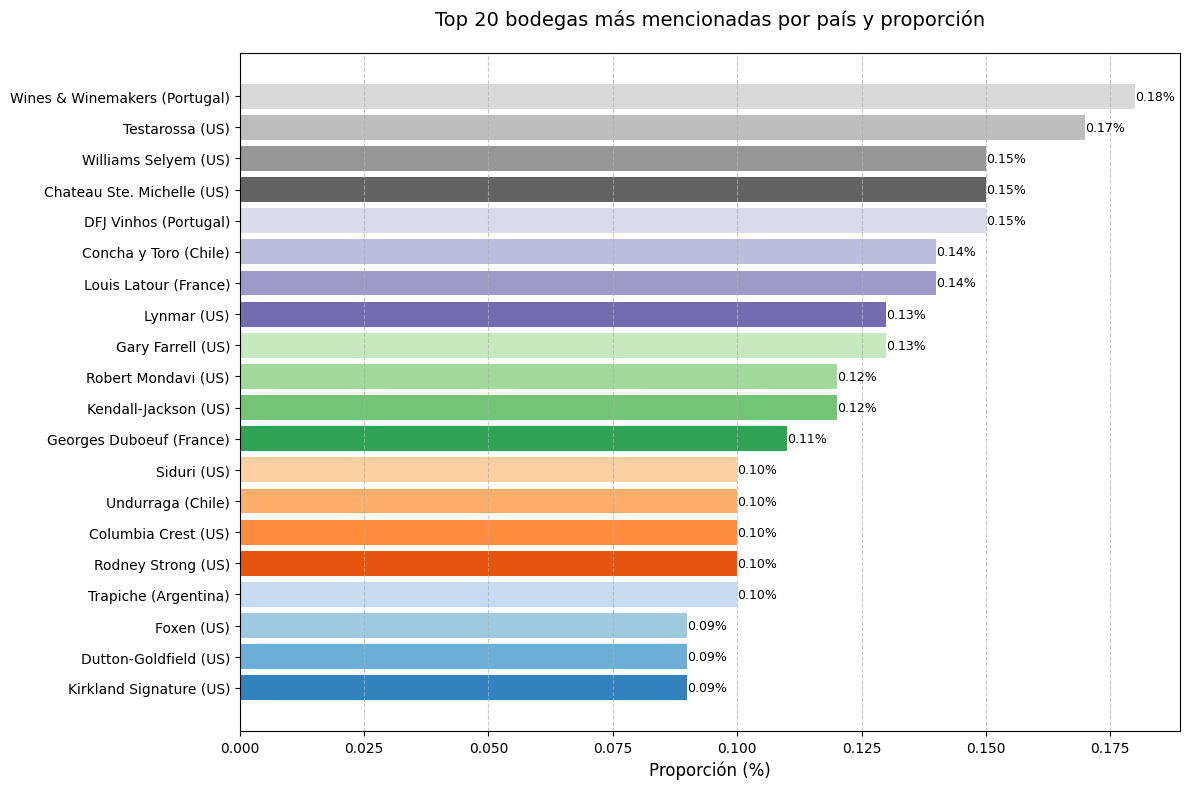

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Obtener datos básicos
top_20_bodegas_2 = df.groupby('winery')['country'].first().loc[df['winery'].value_counts().head(20).index]
proporciones = (df['winery'].value_counts(normalize=True).head(20) * 100)

# 2. Crear DataFrame combinado
resultado = pd.DataFrame({
    'Bodega': proporciones.index,
    'País': top_20_bodegas_2.values,
    'Proporción (%)': proporciones.round(2).values
})

# 3. Ordenar por proporción (opcional)
resultado = resultado.sort_values('Proporción (%)', ascending=True)

# 4. Crear gráfico de barras horizontal
plt.figure(figsize=(12, 8))
bars = plt.barh(
    resultado['Bodega'] + ' (' + resultado['País'] + ')',  # Leyenda combinada
    resultado['Proporción (%)'],
    color=plt.cm.tab20c.colors  # Paleta de colores
)

# 5. Añadir etiquetas y formato
plt.xlabel('Proporción (%)', fontsize=12)
plt.title('Top 20 bodegas más mencionadas por país y proporción', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha= 0.7)

# 6. Añadir valores encima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [33]:
import pandas as pd

#top_variedades = df['variety'].value_counts().head(10)
#top_bodegas = df['winery'].value_counts().head(20)


# 1. Filtrar las 10 variedades y 20 bodegas más frecuentes
top_variedades = df['variety'].value_counts().head(10).index
top_bodegas = df['winery'].value_counts().head(20).index

# 2. Filtrar el DataFrame original
df_filtrado = df[
    (df['variety'].isin(top_variedades)) &
    (df['winery'].isin(top_bodegas))
][['country', 'winery', 'variety', 'points', 'price']].copy()

# 3. Calcular puntos/precio y redondear
df_filtrado['puntos/precio'] = (df_filtrado['points'] / df_filtrado['price']).round(2)

# 4. Modificar el nombre de la bodega (agregar país)
df_filtrado['bodega_pais'] = df_filtrado['winery'] + ' (' + df_filtrado['country'] + ')'

# 5. Ordenar y seleccionar columnas finales
tabla_final = df_filtrado.sort_values(
    by=['country', 'variety', 'winery'],
    ascending=True
)[['country', 'bodega_pais', 'variety', 'points', 'price', 'puntos/precio']]

# Mostrar tabla
#print(tabla_final.to_string(index=False)) #.to_string() --> Pandas convierte el DataFrame en string (texto plano). Index= False, elimina la columna de indices
tabla_final.head(20)


,country,bodega_pais,variety,points,price,puntos/precio
2141,Argentina,Trapiche (Argentina),Cabernet Sauvignon,84,10.0,8.40
3056,Argentina,Trapiche (Argentina),Cabernet Sauvignon,88,15.0,5.87
15948,Argentina,Trapiche (Argentina),Cabernet Sauvignon,90,15.0,6.00
24370,Argentina,Trapiche (Argentina),Cabernet Sauvignon,88,10.0,8.80
30928,Argentina,Trapiche (Argentina),Cabernet Sauvignon,91,30.0,3.03
36746,Argentina,Trapiche (Argentina),Cabernet Sauvignon,85,10.0,8.50
37324,Argentina,Trapiche (Argentina),Cabernet Sauvignon,85,12.0,7.08
53475,Argentina,Trapiche (Argentina),Cabernet Sauvignon,87,10.0,8.70
55024,Argentina,Trapiche (Argentina),Cabernet Sauvignon,89,20.0,4.45
58689,Argentina,Trapiche (Argentina),Cabernet Sauvignon,84,30.0,2.80


#### &#9758; Observa la relación puntos-precio por país

In [34]:
print("Países disponibles:", tabla_final['country'].unique()) # No entiendo por que sale ese NaN en paises.

Países disponibles: ['Argentina' 'Chile' 'France' 'Italy' 'New Zealand' 'Portugal' 'US' nan]


In [35]:
p_v = tabla_final

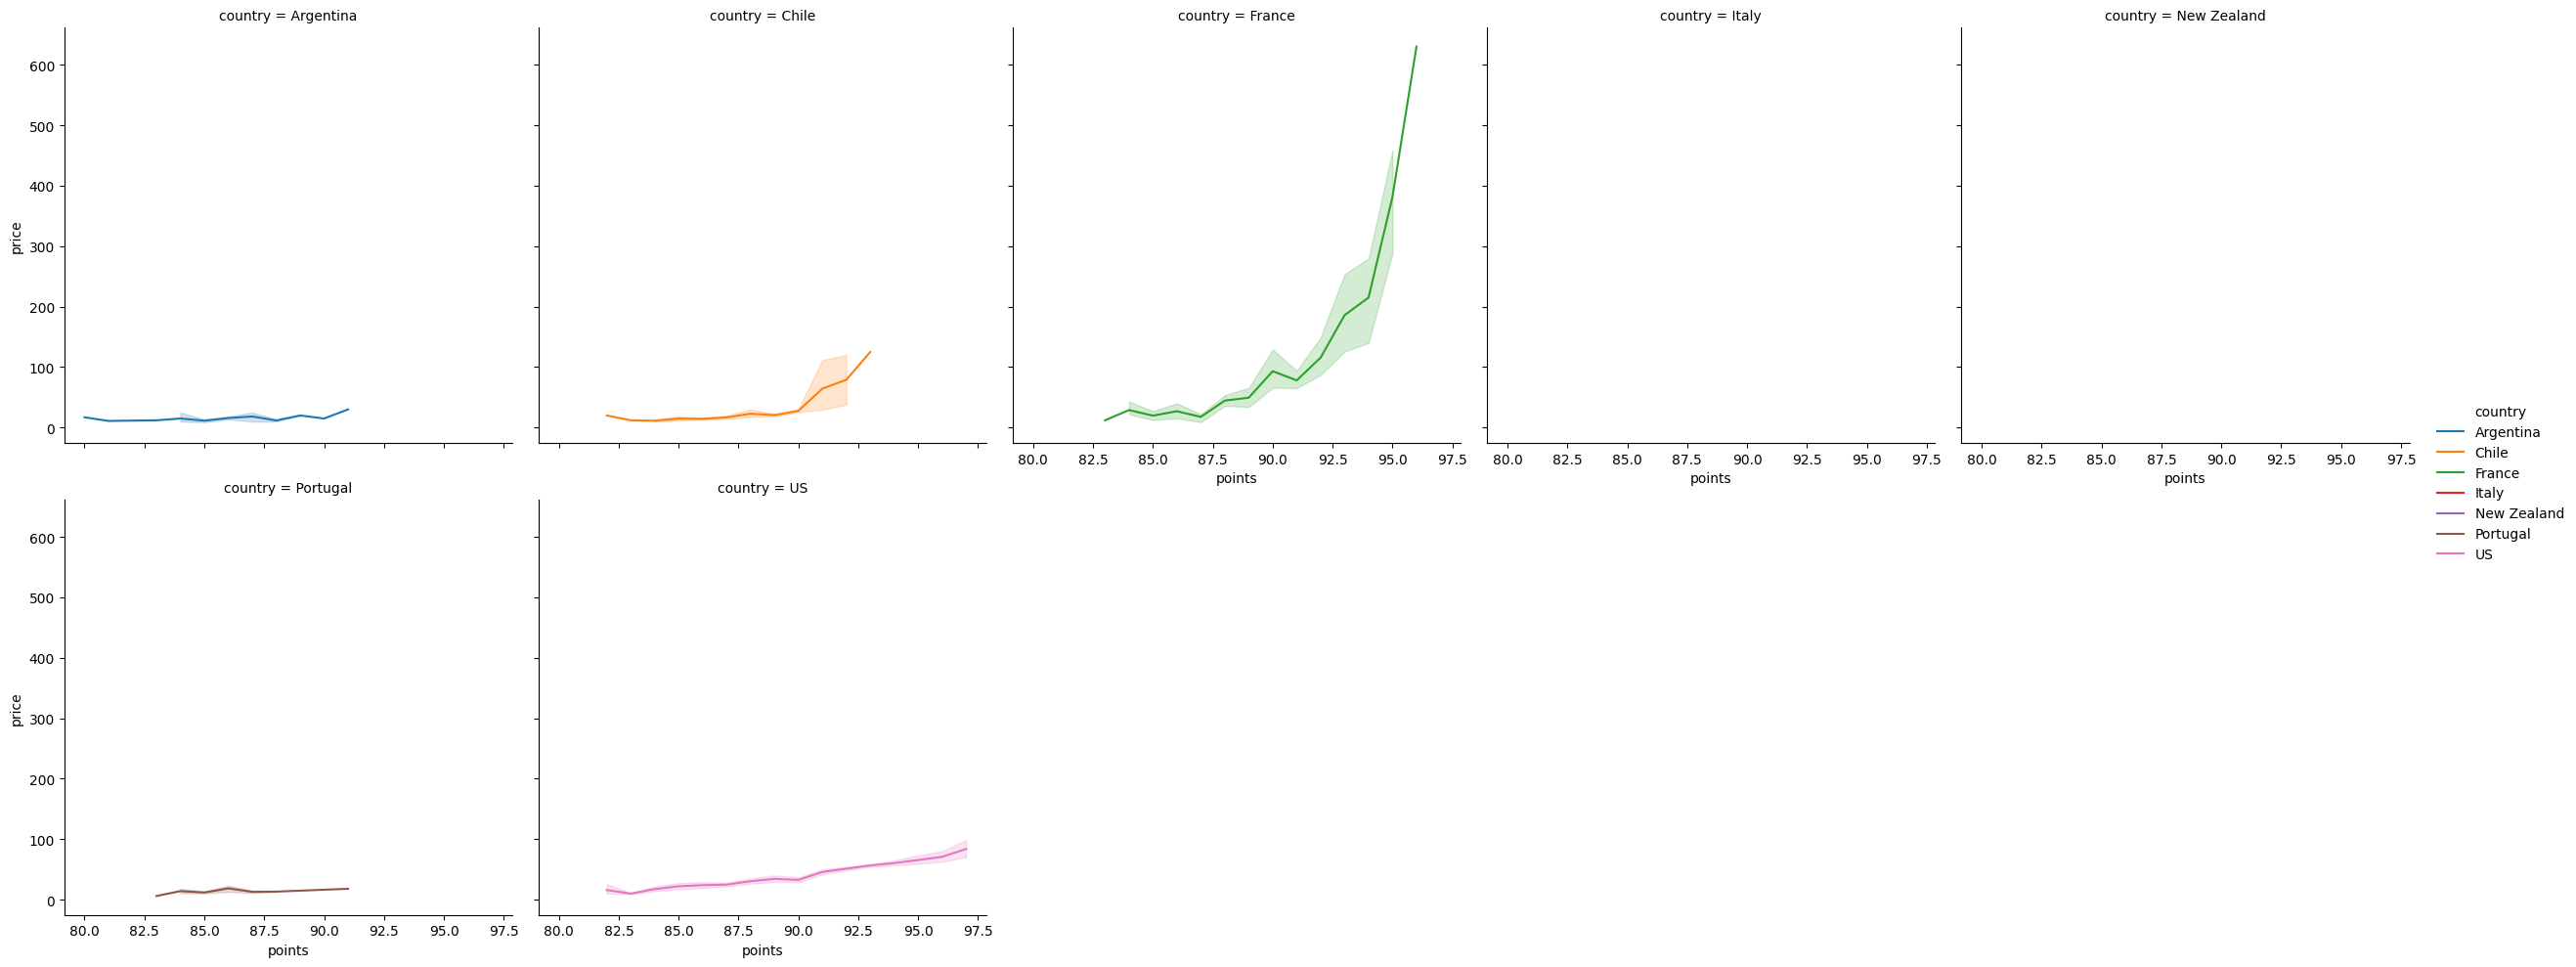

In [36]:
sns.relplot(x="points", y="price", hue="country", col='country', col_wrap=5, kind="line", data=p_v)

In [37]:
p_v_italy = p_v[p_v['country'] == 'Italy']

In [38]:
p_v.isna().sum(axis=0).to_frame().T

,country,bodega_pais,variety,points,price,puntos/precio
0,1,1,0,0,0,0


#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

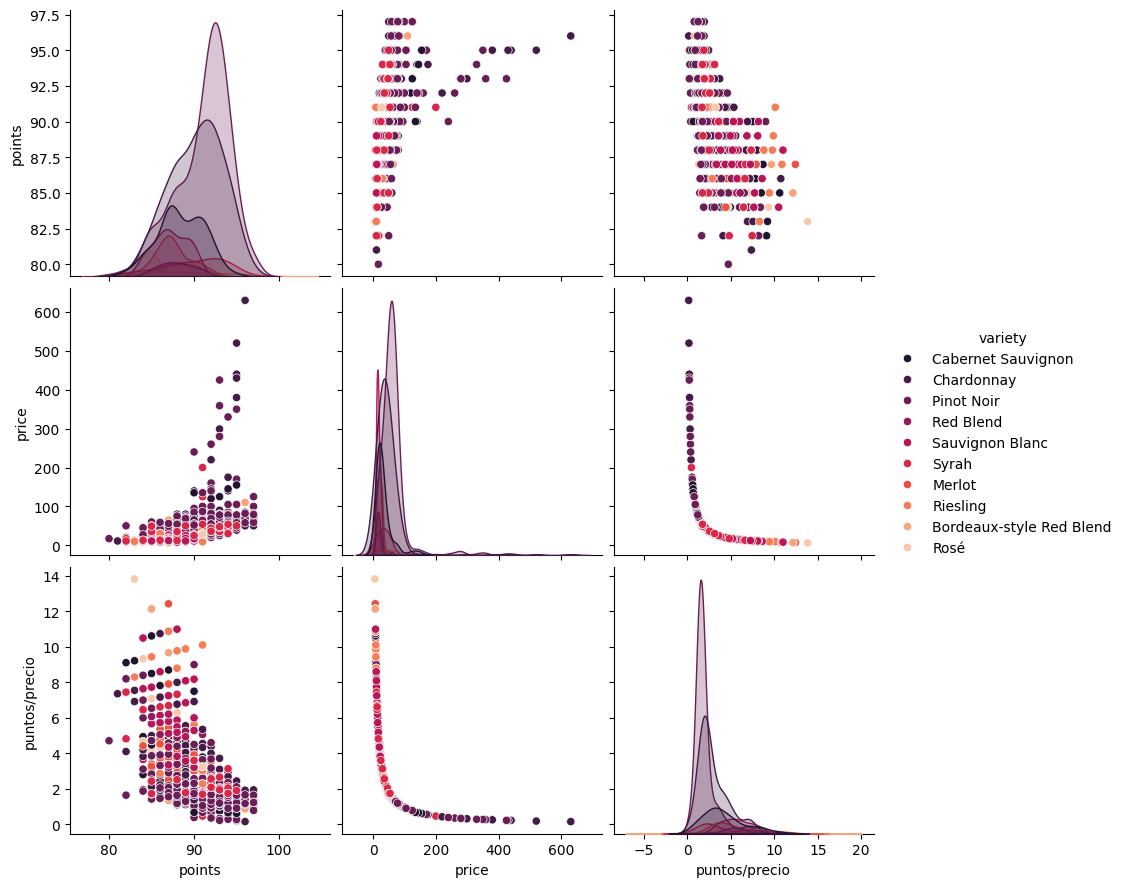

In [39]:
sns.pairplot(p_v, hue="variety", height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

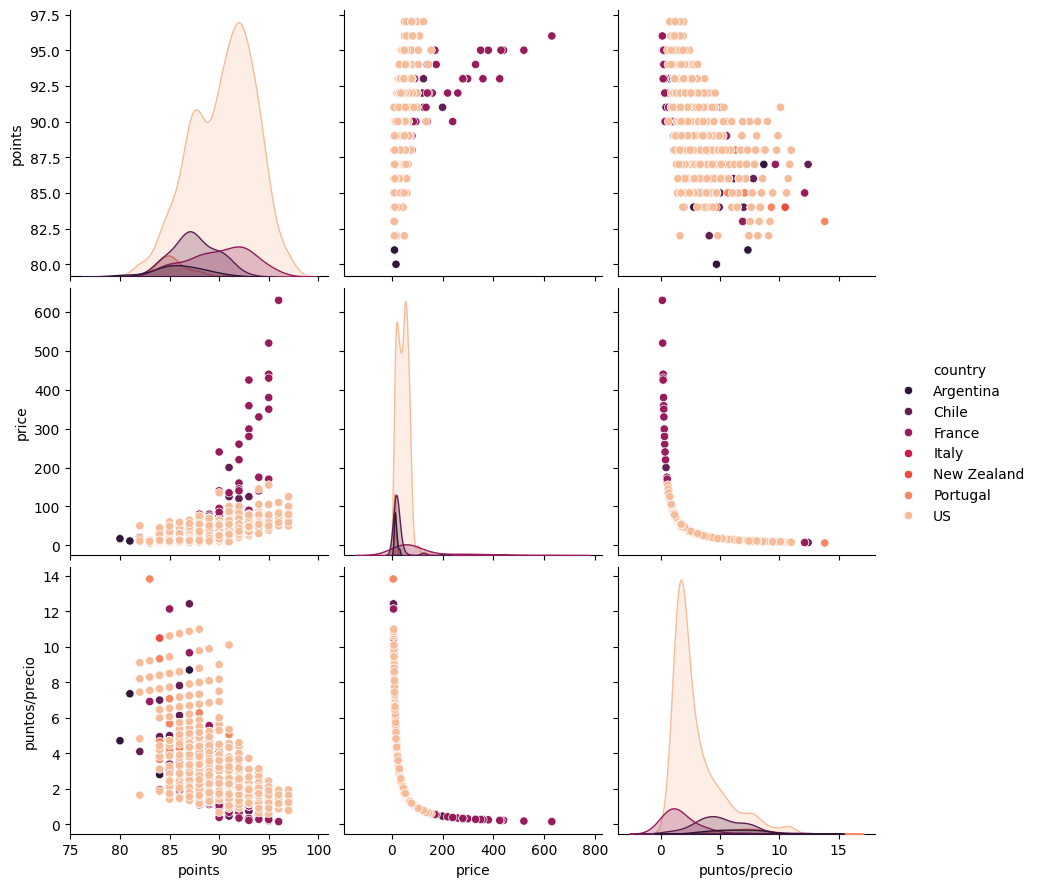

In [40]:
#TU CODIGO
sns.pairplot(p_v, hue="country",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función de la bodega.

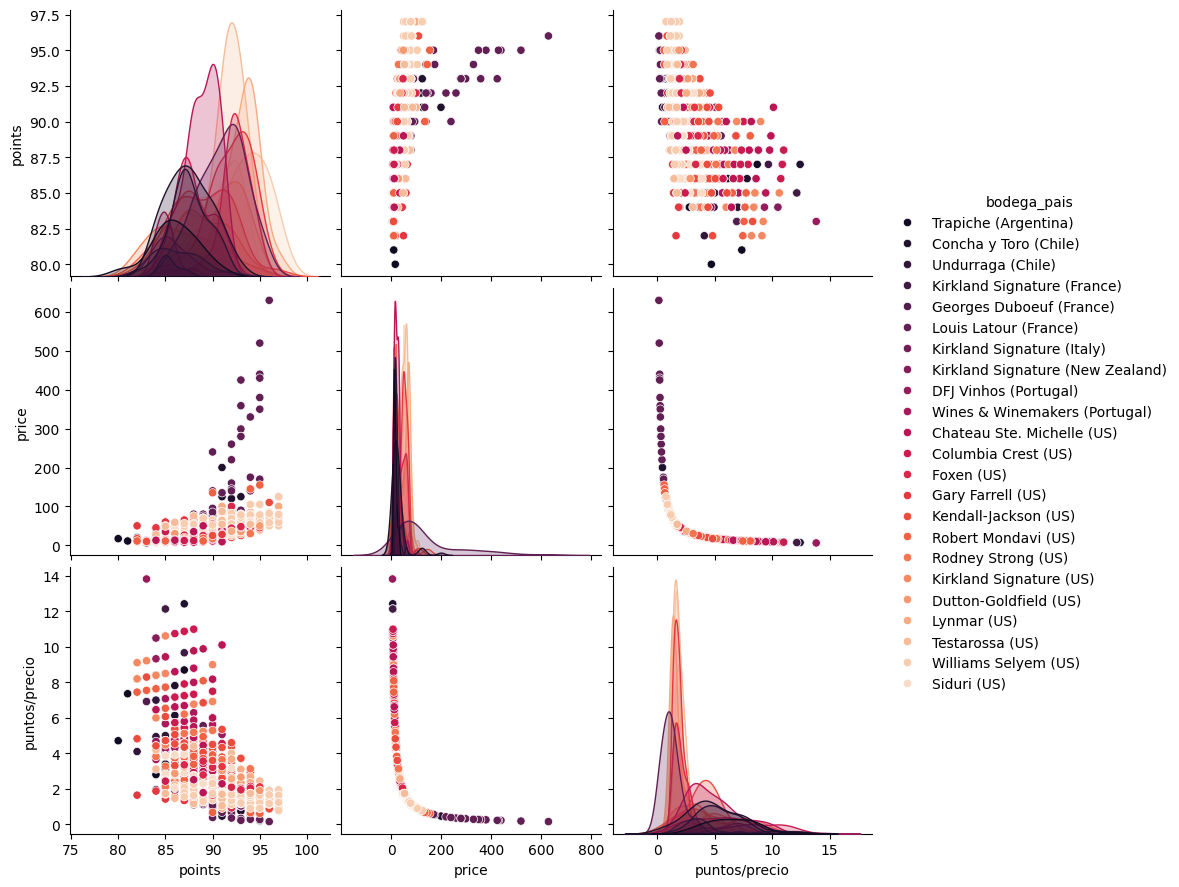

In [41]:
#TU CODIGO
sns.pairplot(p_v, hue='bodega_pais', height=3,palette='rocket')

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

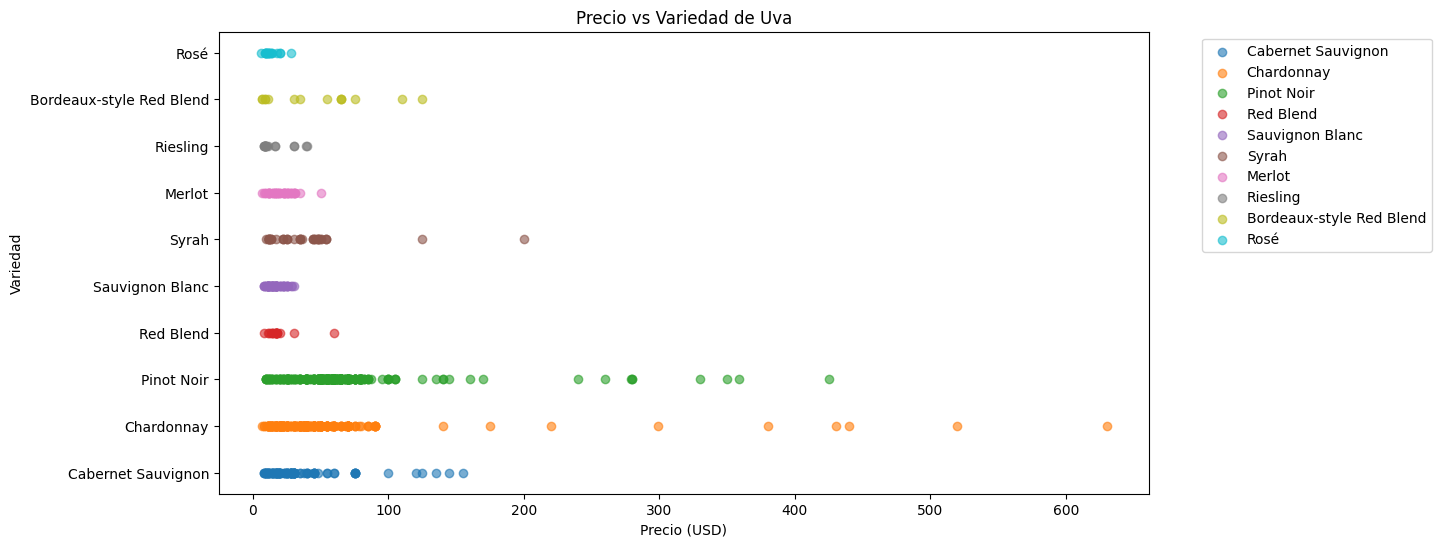

In [42]:
#TU CODIGO
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Scatter plot por variedad
for variety in p_v["variety"].unique():
    subset = p_v[p_v["variety"] == variety]
    plt.scatter(
        subset["price"],
        subset["variety"],
        label=variety,
        alpha=0.6
    )

# Personalizar
plt.title("Precio vs Variedad de Uva")
plt.xlabel("Precio (USD)")
plt.ylabel("Variedad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

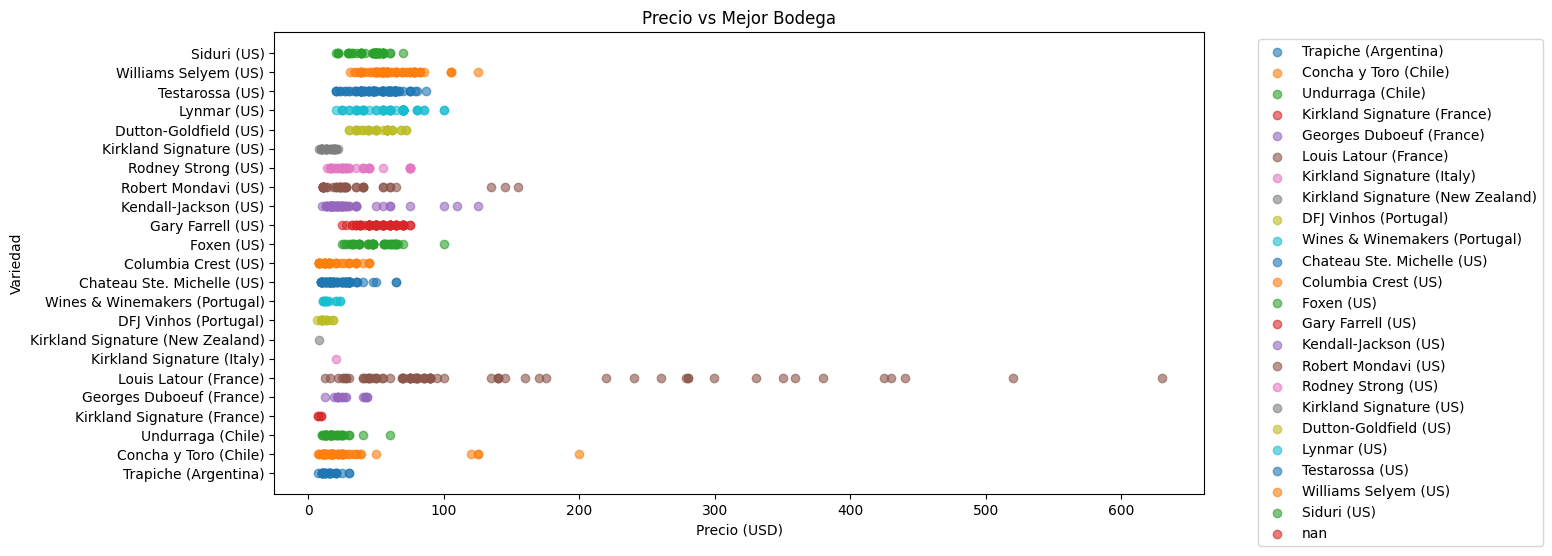

In [43]:
#TU CODIGO

import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Scatter plot por variedad
for bodega in p_v["bodega_pais"].unique():
    subset = p_v[p_v["bodega_pais"] == bodega]
    plt.scatter(
        subset["price"],
        subset["bodega_pais"],
        label=bodega,
        alpha=0.6
    )

# Personalizar
plt.title("Precio vs Mejor Bodega")
plt.xlabel("Precio (USD)")
plt.ylabel("Variedad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

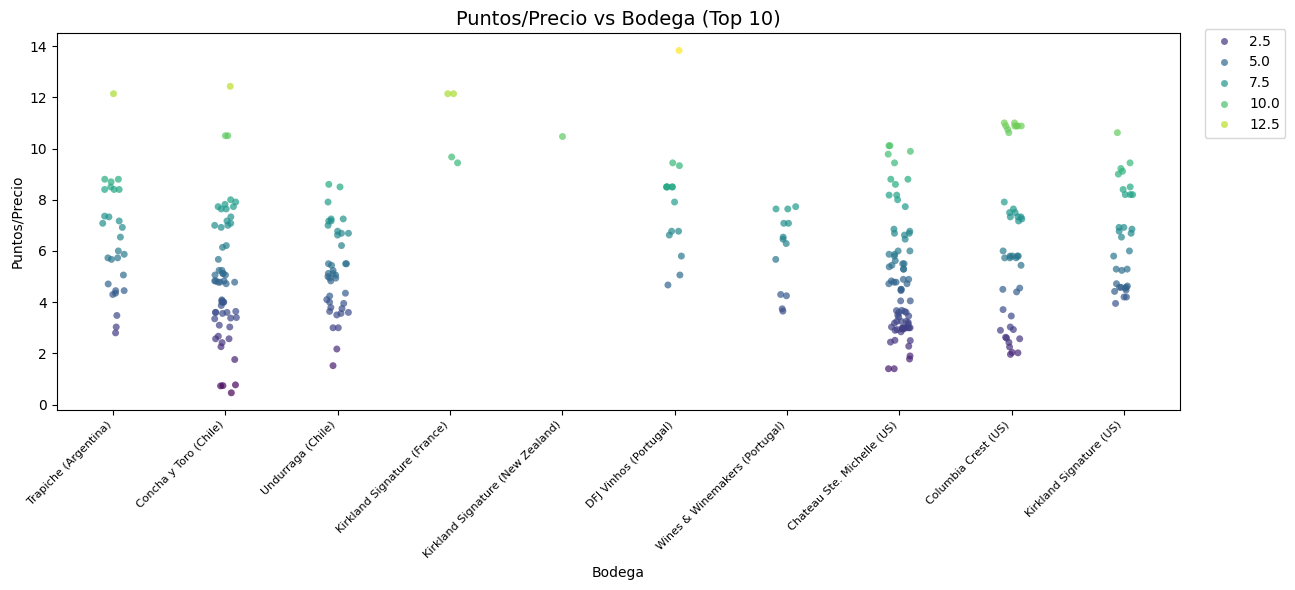

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar bodegas por puntaje/precio (opcional)
top_bodegas = p_v.groupby("bodega_pais")["puntos/precio"].mean().sort_values(ascending=False).head(10).index

# Filtrar solo las top bodegas
p_v_filtered = p_v[p_v["bodega_pais"].isin(top_bodegas)]

# Crear el gráfico con seaborn (maneja mejor categorías)
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=p_v_filtered,
    x="bodega_pais",
    y="puntos/precio",
    hue="puntos/precio",  # Opcional: colorear por el valor
    palette="viridis",
    alpha=0.7,
    jitter=True  # Evita superposición de puntos
)

# Reducir tamaño de etiquetas del eje x
plt.xticks(
    rotation=45,           # Rotar 45 grados
    ha='right',            # Alinear a la derecha
    fontsize=8            # Tamaño de fuente pequeño
)

# Ajustes adicionales
plt.title("Puntos/Precio vs Bodega (Top 10)", fontsize=14)
plt.xlabel("Bodega", fontsize=10)
plt.ylabel("Puntos/Precio", fontsize=10)
plt.tight_layout()  # Ajustar espacio para evitar cortes
plt.legend(bbox_to_anchor=(1.1, 1.03), loc='upper right')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

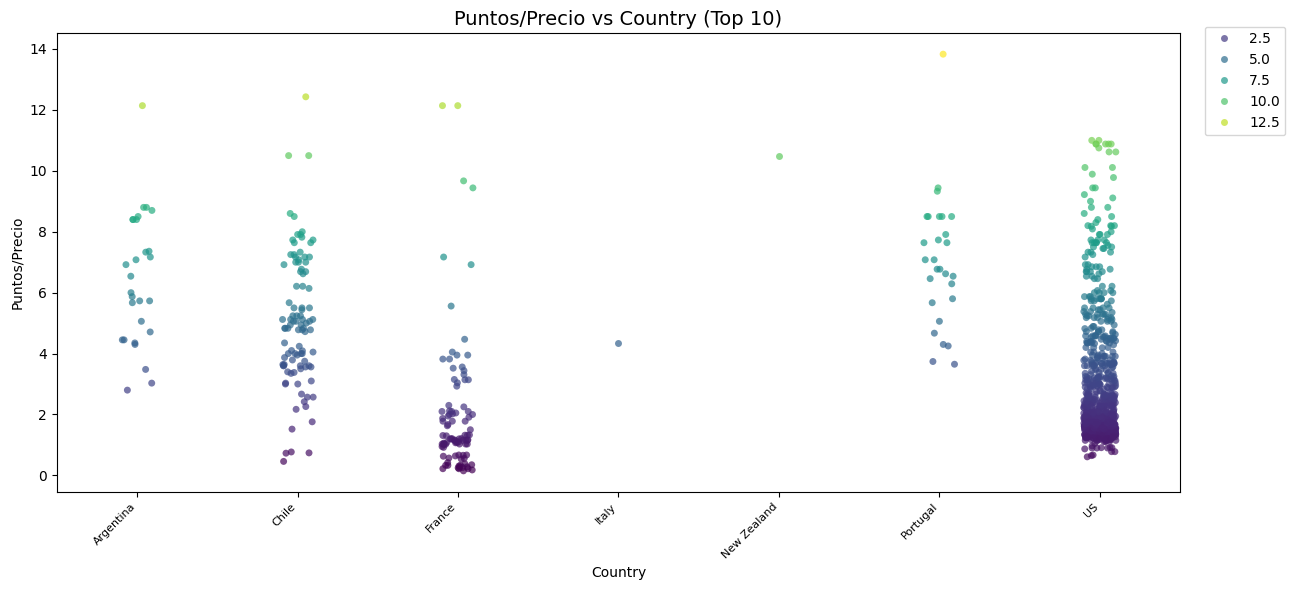

In [45]:
#TU CODIGO
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar bodegas por puntaje/precio (opcional)
top_bodegas_1 = p_v.groupby("country")["puntos/precio"].mean().sort_values(ascending=False).head(10).index

# Filtrar solo las top bodegas
p_v_filtered = p_v[p_v["country"].isin(top_bodegas_1)]

# Crear el gráfico con seaborn (maneja mejor categorías)
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=p_v_filtered,
    x="country",
    y="puntos/precio",
    hue="puntos/precio",  # Opcional: colorear por el valor
    palette="viridis",
    alpha=0.7,
    jitter=True  # Evita superposición de puntos
)

# Reducir tamaño de etiquetas del eje x
plt.xticks(
    rotation=45,           # Rotar 45 grados
    ha='right',            # Alinear a la derecha
    fontsize=8            # Tamaño de fuente pequeño
)

# Ajustes adicionales
plt.title("Puntos/Precio vs Country (Top 10)", fontsize=14)
plt.xlabel("Country", fontsize=10)
plt.ylabel("Puntos/Precio", fontsize=10)
plt.tight_layout()  # Ajustar espacio para evitar cortes
plt.legend(bbox_to_anchor=(1.1, 1.03), loc='upper right')
plt.show()

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [46]:
vinosMX_1 = vinosMX
vinosMX_1.head(2)

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0


In [47]:
vinosMX_1.drop(columns=["description"], inplace=True)
vinosMX_1.head(2)

,country,winery,variety,points,price
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0


In [48]:
print("Columnas en p_v:", p_v.columns.tolist())
print("Columnas en vinosMX:", vinosMX_1.columns.tolist())

Columnas en p_v: ['country', 'bodega_pais', 'variety', 'points', 'price', 'puntos/precio']
Columnas en vinosMX: ['country', 'winery', 'variety', 'points', 'price']


In [49]:
p_v = p_v.rename(columns={"bodega_pais": "winery"})

In [50]:
#TU CODIGO
df3 = pd.concat([p_v, vinosMX], axis=0, ignore_index= True)
df3.head(3)

,country,winery,variety,points,price,puntos/precio
0,Argentina,Trapiche (Argentina),Cabernet Sauvignon,84,10.0,8.40
1,Argentina,Trapiche (Argentina),Cabernet Sauvignon,88,15.0,5.87
2,Argentina,Trapiche (Argentina),Cabernet Sauvignon,90,15.0,6.00


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [51]:
# TU CODIGO
import pandas as pd

# Solo vinos de México
df_mexico = df3[df3['country'] == 'Mexico'].copy()

# Calcular points/price con apply()
df_mexico['points/price'] = df_mexico.apply(
    lambda row: row['points'] / row['price'] if row['price'] != 0 else None,  # Evitar división por cero
    axis=1)

# Mostrar las columnas relevantes
resultado = df_mexico[['points', 'price', 'points/price']]
print(resultado.head())

      points  price  points/price
996       88   18.0      4.888889
997       87   15.0      5.800000
998       87   18.0      4.833333
999       88   27.0      3.259259
1000      83    8.0     10.375000


#### &#9758; Observa la relación puntos-precio por país

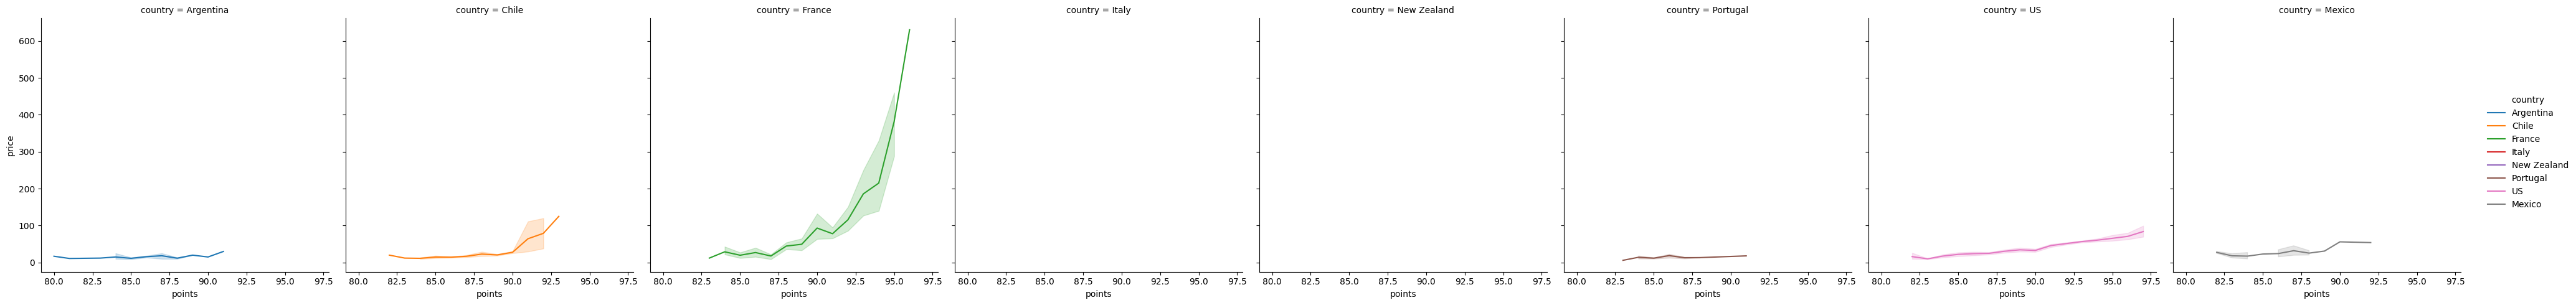

In [52]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

     country              winery  points  price
1021  Mexico      Viñas de Garza      92   54.0
1022  Mexico          L.A. Cetto      84   10.0
1023  Mexico  Hacienda La Lomita      86   22.0
1024  Mexico           La Lomita      88   40.0
1025  Mexico         Monte Xanic      86   23.0


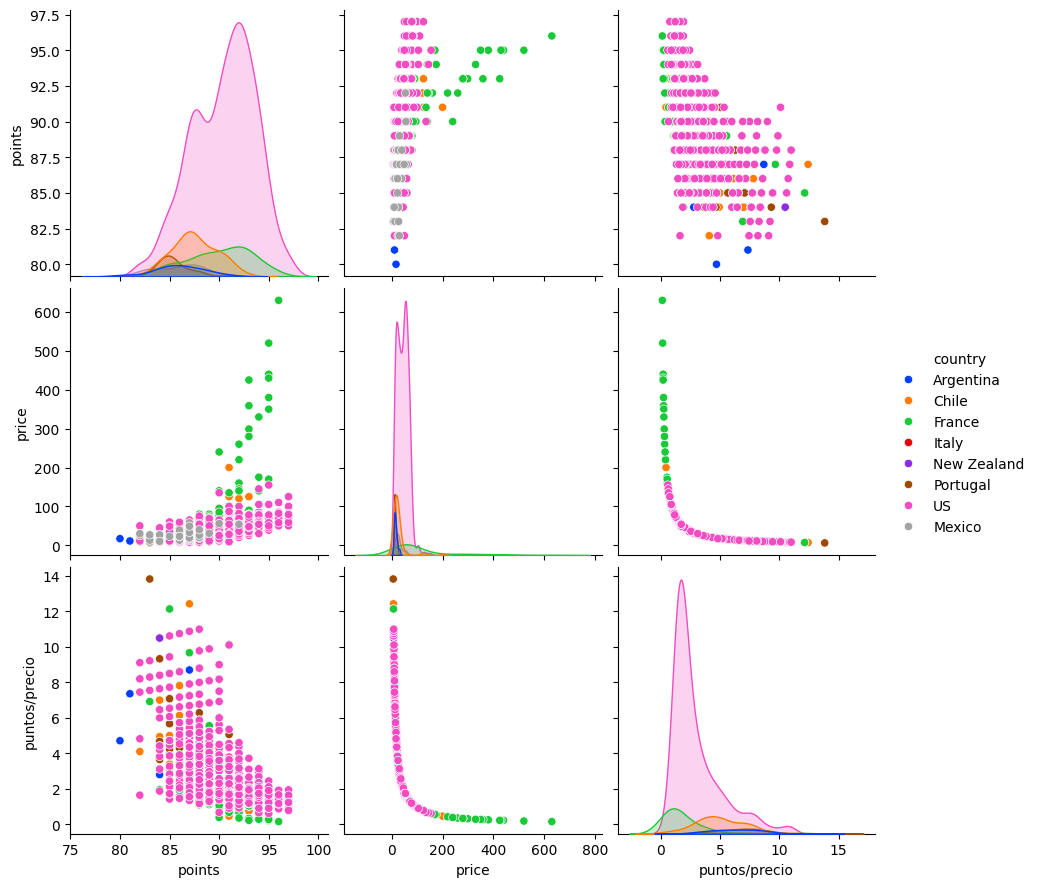

In [53]:

# 1. Filtrar los datos de México y el resto de países
df_mexico = df3[df3['country'] == 'Mexico'].copy()  # Datos de México
df_otros = df3[df3['country'] != 'Mexico'].copy()   # Datos de otros países

# 2. Concatenar: primero otros países, luego México
mx_top = pd.concat([df_otros, df_mexico], axis=0, ignore_index=True)

# 3. Mostrar resultados (opcional)
print(mx_top[['country', 'winery', 'points', 'price']].tail())  # Ver últimos registros (México)


sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-54-a75306f8387d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'New Zealand'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'US'),
  Text(7, 0, 'Mexico')])

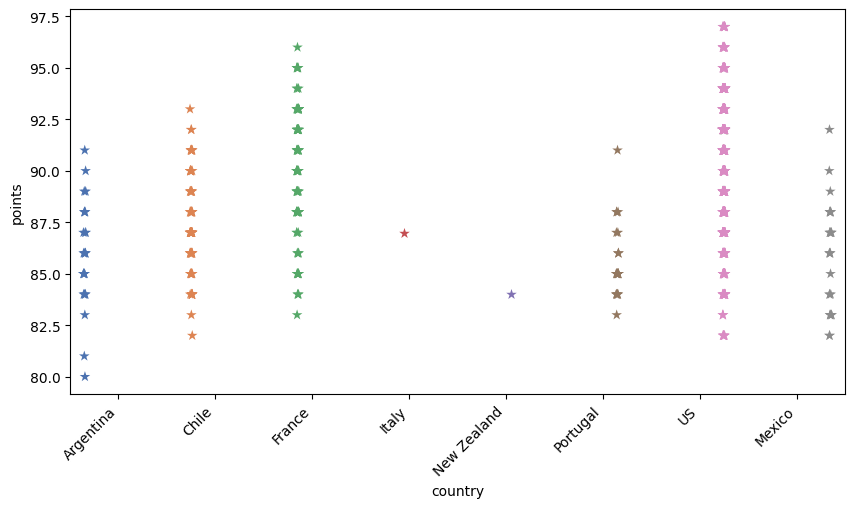

In [54]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-55-d31340acea07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Trapiche (Argentina)'),
  Text(1, 0, 'Concha y Toro (Chile)'),
  Text(2, 0, 'Undurraga (Chile)'),
  Text(3, 0, 'Kirkland Signature (France)'),
  Text(4, 0, 'Georges Duboeuf (France)'),
  Text(5, 0, 'Louis Latour (France)'),
  Text(6, 0, 'Kirkland Signature (Italy)'),
  Text(7, 0, 'Kirkland Signature (New Zealand)'),
  Text(8, 0, 'DFJ Vinhos (Portugal)'),
  Text(9, 0, 'Wines & Winemakers (Portugal)'),
  Text(10, 0, 'Chateau Ste. Michelle (US)'),
  Text(11, 0, 'Columbia Crest (US)'),
  Text(12, 0, 'Foxen (US)'),
  Text(13, 0, 'Gary Farrell (US)'),
  Text(14, 0, 'Kendall-Jackson (US)'),
  Text(15, 0, 'Robert Mondavi (US)'),
  Text(16, 0, 'Rodney Strong (US)'),
  Text(17, 0, 'Kirkland Signature (US)'),
  Text(18, 0, 'Dutton-Goldfield (US)'),
  Text(19, 0,

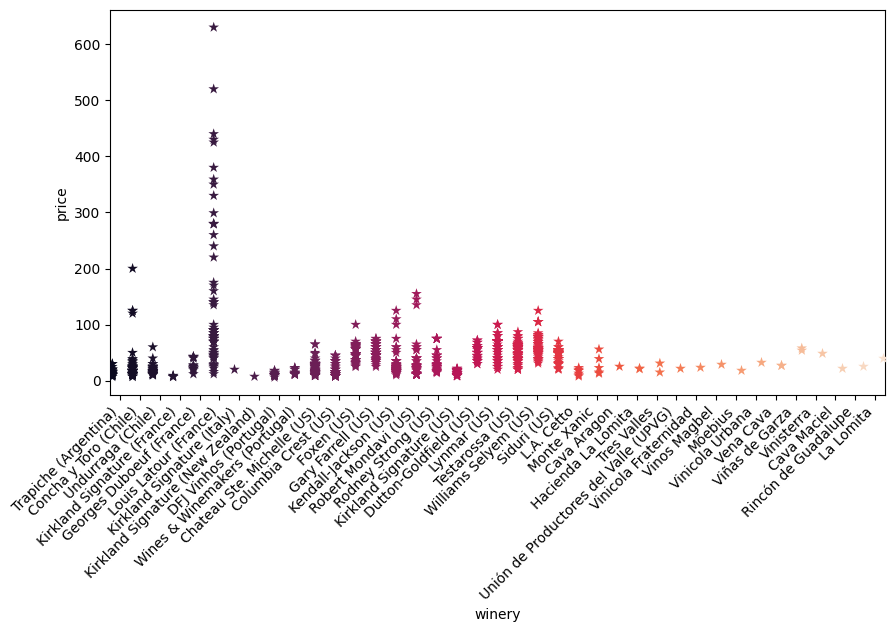

In [55]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [56]:
# Verifica valores nulos o enmascarados
print("Valores nulos en 'winery':", df3['winery'].isna().sum())
print("Valores nulos en 'points/price':", df3['puntos/precio'].isna().sum())

# Elimina filas con valores nulos (si es apropiado)
df3_clean = df3.dropna(subset=['winery', 'puntos/precio'])

Valores nulos en 'winery': 1
Valores nulos en 'points/price': 30


In [57]:
# Convierte a string si el eje X es categórico
df3['winery'] = df3['winery'].astype(str)

# Reemplaza NaN por 0 o un valor mínimo en el eje Y (si es numérico)
df3['puntos/precio'] = df3['puntos/precio'].fillna(0)

<ipython-input-58-90a67f15e8a0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='country', ylabel='puntos/precio'>

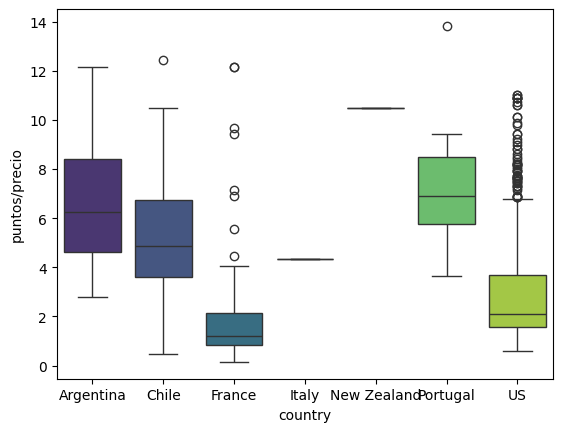

In [58]:
sns.boxplot(
    data=df3_clean,
    x='country',        # Eje categórico
    y='puntos/precio',   # Eje numérico
    palette='viridis'
)

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

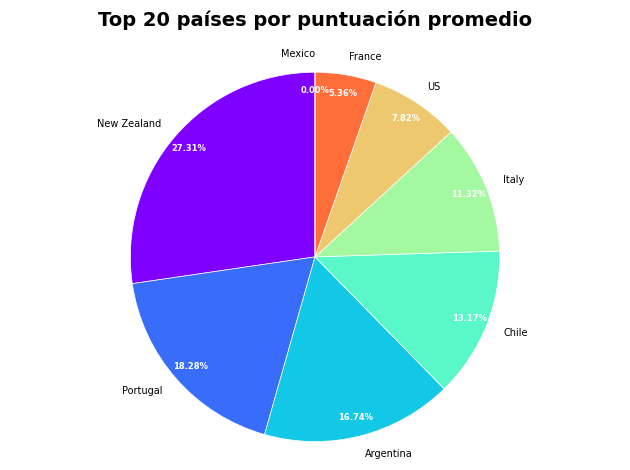

In [66]:
import matplotlib.pyplot as plt
import numpy as np

proporcion_pais = df3.groupby('country')['puntos/precio'].mean().sort_values(ascending=False)
top_paises = proporcion_pais.head(10)

# Datos
labels = top_paises.index
sizes = top_paises.values
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

# Crear gráfico con plt.pie() (devuelve wedges, texts, autotexts)
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors,
    startangle= 90,
    pctdistance=0.9,
    textprops={'fontsize': 7},
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

# Personalizar autotexts (ahora la variable existe)
plt.setp(autotexts, size=6, weight='bold', color='white')

# Añadir título
plt.title('Top 20 países por puntuación promedio', fontsize=14, pad=20, weight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.axis('equal')
plt.show()